<a href="https://colab.research.google.com/github/RmmR504/Portfolio/blob/Projects/Portfolio%20-%20Feature%20Engineering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### **Roney Mauricio Molina**


EMPLOYEES DATASET

In the following report, feature engineering will be applied to generate 2 quality data bases that will help to predict the employee attrition rate to further implement a correction plan.

In [ ]:
# Importación de librerías para etapa inicial
import pandas as pd

In [ ]:
# Vinculación con Google Drive
from google.colab import drive
drive.mount("/content/drive")
%cd "/content/drive/MyDrive/Colab Notebooks/M6"

Mounted at /content/drive
/content/drive/MyDrive/Colab Notebooks/M6


In [ ]:
# Lectura de datos ("employees.csv")
datos = pd.read_csv("/content/drive/MyDrive/Archivos de datos EJEMPLOS/M6/Employees (1).csv")
datos.head()

,Employee_ID,Gender,Age,Education_Level,Relationship_Status,Hometown,Unit,Decision_skill_possess,Time_of_service,Time_since_promotion,growth_rate,Travel_Rate,Post_Level,Pay_Scale,Compensation_and_Benefits,Work_Life_balance,Attrition_rate
0,EID_23371,F,42.0,4,Married,Franklin,IT,Conceptual,4.0,4,33,1,1,7.0,type2,3.0,0.1841
1,EID_18000,M,24.0,3,Single,Springfield,Logistics,Analytical,5.0,4,36,0,3,6.0,type2,4.0,0.0670
2,EID_3891,F,58.0,3,Married,Clinton,Quality,Conceptual,27.0,3,51,0,2,8.0,type2,1.0,0.0851
3,EID_17492,F,26.0,3,Single,Lebanon,Human Resource Management,Behavioral,4.0,3,56,1,3,8.0,type2,1.0,0.0668
4,EID_22534,F,31.0,1,Married,Springfield,Logistics,Conceptual,5.0,4,62,1,3,2.0,type3,3.0,0.1827


In [ ]:
# Determinación de dimensión de los datos
datos.shape

(7000, 17)

# STEP 1 - Data Profiling.

In [ ]:
# Detectar cuántos valores perdidios tiene cada columna
# De 17 variables 3 tienen valores faltantes
pd.isna(datos).sum()

Employee_ID                    0
Gender                         0
Age                          412
Education_Level                0
Relationship_Status            0
Hometown                       0
Unit                           0
Decision_skill_possess         0
Time_of_service              144
Time_since_promotion           0
growth_rate                    0
Travel_Rate                    0
Post_Level                     0
Pay_Scale                      9
Compensation_and_Benefits      0
Work_Life_balance             11
Attrition_rate                 0
dtype: int64

In [ ]:
# Age - imputar con mediana para asignar un valor entero a que el resto de la información de la variable está en número enteros. Se toma la mediana(37 años) y no la media(39.62 años) porque en el dataset hay
# más personas con 37 años o menos que mayores a 37
#datos["Age"].describe()
datos["Age"].fillna(datos["Age"].median(), inplace=True)

In [ ]:
pd.isna(datos).sum()

Employee_ID                    0
Gender                         0
Age                            0
Education_Level                0
Relationship_Status            0
Hometown                       0
Unit                           0
Decision_skill_possess         0
Time_of_service              144
Time_since_promotion           0
growth_rate                    0
Travel_Rate                    0
Post_Level                     0
Pay_Scale                      9
Compensation_and_Benefits      0
Work_Life_balance             11
Attrition_rate                 0
dtype: int64

In [ ]:
# Time_of_service - imputar con la mediana para mantener una misma linea con el punto anterior.
#datos["Time_of_service"].describe()
datos["Time_of_service"].fillna(datos["Time_of_service"].median(), inplace=True)

In [ ]:
pd.isna(datos).sum()

Employee_ID                   0
Gender                        0
Age                           0
Education_Level               0
Relationship_Status           0
Hometown                      0
Unit                          0
Decision_skill_possess        0
Time_of_service               0
Time_since_promotion          0
growth_rate                   0
Travel_Rate                   0
Post_Level                    0
Pay_Scale                     9
Compensation_and_Benefits     0
Work_Life_balance            11
Attrition_rate                0
dtype: int64

In [ ]:
#Work_Life_balance - imputar con el promedio redondeado a la unidad. En este caso sería lo mismo que imputar utilizando la mediana. La moda nos quedaría muy abajo de la realidad de todos los datos de la variable.
#datos["Work_Life_balance"].describe()
#datos["Work_Life_balance"].value_counts()
datos["Work_Life_balance"].fillna(round(datos["Work_Life_balance"].mean()), inplace=True)

In [ ]:
pd.isna(datos).sum()

Employee_ID                  0
Gender                       0
Age                          0
Education_Level              0
Relationship_Status          0
Hometown                     0
Unit                         0
Decision_skill_possess       0
Time_of_service              0
Time_since_promotion         0
growth_rate                  0
Travel_Rate                  0
Post_Level                   0
Pay_Scale                    9
Compensation_and_Benefits    0
Work_Life_balance            0
Attrition_rate               0
dtype: int64

In [ ]:
# Pay_Scale - imputar valor con el promedio, considerando que es igual a la mediana en este caso también.
#datos["Pay_Scale"].describe()
#datos["Pay_Scale"].value_counts()
datos["Pay_Scale"].fillna(round(datos["Pay_Scale"].mean()), inplace=True)

In [ ]:
pd.isna(datos).sum()

Employee_ID                  0
Gender                       0
Age                          0
Education_Level              0
Relationship_Status          0
Hometown                     0
Unit                         0
Decision_skill_possess       0
Time_of_service              0
Time_since_promotion         0
growth_rate                  0
Travel_Rate                  0
Post_Level                   0
Pay_Scale                    0
Compensation_and_Benefits    0
Work_Life_balance            0
Attrition_rate               0
dtype: int64

# STEP 2 - Variable treatment and Feature Engineering.

In [ ]:
datos.describe()

,Age,Education_Level,Time_of_service,Time_since_promotion,growth_rate,Travel_Rate,Post_Level,Pay_Scale,Work_Life_balance,Attrition_rate
count,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000
mean,39.468429,3.187857,13.315429,2.367143,47.064286,0.817857,2.798000,6.006286,2.387286,0.189376
std,13.214784,1.065102,10.268266,1.149395,15.761406,0.648205,1.163721,2.057112,1.122009,0.185753
min,19.000000,1.000000,0.000000,0.000000,20.000000,0.000000,1.000000,1.000000,1.000000,0.000000
25%,28.000000,3.000000,5.000000,1.000000,33.000000,0.000000,2.000000,5.000000,1.000000,0.070400
50%,37.000000,3.000000,10.000000,2.000000,47.000000,1.000000,3.000000,6.000000,2.000000,0.142650
75%,51.000000,4.000000,20.000000,3.000000,61.000000,1.000000,3.000000,8.000000,3.000000,0.235000
max,65.000000,5.000000,43.000000,4.000000,74.000000,2.000000,5.000000,10.000000,5.000000,0.995900


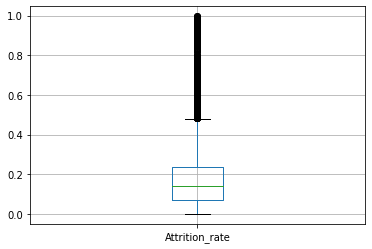

In [ ]:
# Análisis de la variable Y

boxplot = datos.boxplot(column=['Attrition_rate'])
boxplot

(array([2437., 2455., 1195.,  169.,  168.,  161.,  127.,  158.,   56.,
          74.]),
 array([0.     , 0.09959, 0.19918, 0.29877, 0.39836, 0.49795, 0.59754,
        0.69713, 0.79672, 0.89631, 0.9959 ]),
 <a list of 10 Patch objects>)

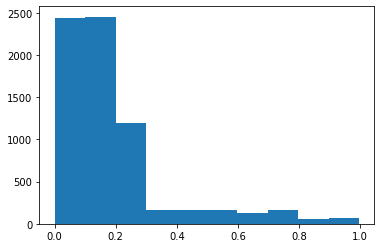

In [ ]:
import matplotlib.pyplot as plt
plt.hist(datos.Attrition_rate)

The Y variable as is, seems to present no atypical values, an understandable histogram with a prominent skew to the right.

In [ ]:
datos["Attrition_rate"].skew()

2.056875960544357

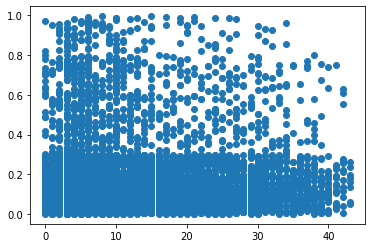

In [ ]:
#plt.scatter(x=datos.Gender, y=datos.Attrition_rate)
#plt.scatter(x=datos.Age, y=datos.Attrition_rate)
#plt.scatter(x=datos.Education_Level, y=datos.Attrition_rate)
#plt.scatter(x=datos.Relationship_Status, y=datos.Attrition_rate)
#plt.scatter(x=datos.Hometown, y=datos.Attrition_rate)
#plt.scatter(x=datos.Unit, y=datos.Attrition_rate)
#plt.scatter(x=datos.Decision_skill_possess, y=datos.Attrition_rate)
plt.scatter(x=datos.Time_of_service, y=datos.Attrition_rate)
#plt.scatter(x=datos.Time_since_promotion, y=datos.Attrition_rate)
#plt.scatter(x=datos.growth_rate, y=datos.Attrition_rate)
#plt.scatter(x=datos.Travel_Rate, y=datos.Attrition_rate)
#plt.scatter(x=datos.Post_Level, y=datos.Attrition_rate)
#plt.scatter(x=datos.Pay_Scale, y=datos.Attrition_rate)
#plt.scatter(x=datos.Compensation_and_Benefits, y=datos.Attrition_rate)
#plt.scatter(x=datos.Work_Life_balance, y=datos.Attrition_rate)

In [ ]:
# Dado que los valores en la variable Y están muy cercanos y son pequeños, no hace sentido aplicar una transformación logarítmica ya que al final no habría mucha diferencia en el skew
# de la gráfica.

import numpy as np
datos['log'] = (datos['Attrition_rate']+0.1).transform(np.log)
datos

,Employee_ID,Gender,Age,Education_Level,Relationship_Status,Hometown,Unit,Decision_skill_possess,Time_of_service,Time_since_promotion,growth_rate,Travel_Rate,Post_Level,Pay_Scale,Compensation_and_Benefits,Work_Life_balance,Attrition_rate,log
0,EID_23371,F,42.0,4,Married,Franklin,IT,Conceptual,4.0,4,33,1,1,7.0,type2,3.0,0.1841,-1.258429
1,EID_18000,M,24.0,3,Single,Springfield,Logistics,Analytical,5.0,4,36,0,3,6.0,type2,4.0,0.0670,-1.789761
2,EID_3891,F,58.0,3,Married,Clinton,Quality,Conceptual,27.0,3,51,0,2,8.0,type2,1.0,0.0851,-1.686859
3,EID_17492,F,26.0,3,Single,Lebanon,Human Resource Management,Behavioral,4.0,3,56,1,3,8.0,type2,1.0,0.0668,-1.790960
4,EID_22534,F,31.0,1,Married,Springfield,Logistics,Conceptual,5.0,4,62,1,3,2.0,type3,3.0,0.1827,-1.263369
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6995,EID_16328,F,23.0,5,Married,Franklin,Operarions,Behavioral,4.0,1,20,1,2,6.0,type3,3.0,0.7839,-0.123411
6996,EID_8387,F,44.0,1,Married,Lebanon,R&D,Analytical,16.0,2,59,0,2,4.0,type3,3.0,0.1055,-1.582309
6997,EID_8077,F,49.0,3,Single,Springfield,IT,Directive,10.0,1,59,1,2,3.0,type2,4.0,0.7847,-0.122507
6998,EID_19597,F,47.0,3,Married,Washington,Sales,Behavioral,24.0,1,21,1,5,8.0,type0,2.0,0.4162,-0.661261


(array([2437., 2455., 1195.,  169.,  168.,  161.,  127.,  158.,   56.,
          74.]),
 array([0.     , 0.09959, 0.19918, 0.29877, 0.39836, 0.49795, 0.59754,
        0.69713, 0.79672, 0.89631, 0.9959 ]),
 <a list of 10 Patch objects>)

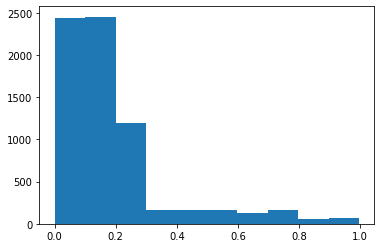

In [ ]:
plt.hist(datos.Attrition_rate)

# Scaling and Normalization

In [ ]:
datos.describe()

,Age,Education_Level,Time_of_service,Time_since_promotion,growth_rate,Travel_Rate,Post_Level,Pay_Scale,Work_Life_balance,Attrition_rate
count,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000
mean,39.468429,3.187857,13.315429,2.367143,47.064286,0.817857,2.798000,6.006286,2.387286,0.189376
std,13.214784,1.065102,10.268266,1.149395,15.761406,0.648205,1.163721,2.057112,1.122009,0.185753
min,19.000000,1.000000,0.000000,0.000000,20.000000,0.000000,1.000000,1.000000,1.000000,0.000000
25%,28.000000,3.000000,5.000000,1.000000,33.000000,0.000000,2.000000,5.000000,1.000000,0.070400
50%,37.000000,3.000000,10.000000,2.000000,47.000000,1.000000,3.000000,6.000000,2.000000,0.142650
75%,51.000000,4.000000,20.000000,3.000000,61.000000,1.000000,3.000000,8.000000,3.000000,0.235000
max,65.000000,5.000000,43.000000,4.000000,74.000000,2.000000,5.000000,10.000000,5.000000,0.995900


In [ ]:
datos = datos.drop(['Employee_ID', 'log'], axis = 1)

In [ ]:
datos.shape

(7000, 16)

In [ ]:
columns = ['Attrition_rate', 'Gender', 'Relationship_Status', 'Hometown', 'Unit', 'Decision_skill_possess', 'Compensation_and_Benefits']
categoricas = pd.DataFrame(datos, columns=columns) #variables categóricas y variable respuesta (y)

numericas = datos.drop(['Attrition_rate', 'Gender', 'Relationship_Status', 'Hometown', 'Unit', 'Decision_skill_possess', 'Compensation_and_Benefits'], axis = 1)

from sklearn.preprocessing import StandardScaler
#from sklearn.preprocessing import MinMaxScaler
scaler = StandardScaler()
scaled = scaler.fit_transform(numericas)
scaled

array([[ 0.19158484,  0.76255659, -0.90727044, ..., -1.54515422,
         0.48309742,  0.54612586],
       [-1.17062324, -0.17638732, -0.80987606, ...,  0.17359352,
        -0.00305582,  1.43744808],
       [ 1.40243646, -0.17638732,  1.33280043, ..., -0.68578035,
         0.96925066, -1.23651858],
       ...,
       [ 0.72133242, -0.17638732, -0.32290413, ..., -0.68578035,
        -1.46151554,  1.43744808],
       [ 0.56997597, -0.17638732,  1.04061727, ...,  1.89234127,
         0.96925066, -0.34519636],
       [ 1.40243646, -0.17638732,  0.8458285 , ...,  1.03296739,
        -0.48920906,  0.54612586]])

In [ ]:
numericas = pd.DataFrame(scaled)
numericas.columns = ['Age', 'Education_Level', 'Time_of_service', 'Time_since_promotion', 'growth_rate', 'Travel_Rate', 'Post_Level', 'Pay_Scale', 'Work_Life_balance']
numericas

,Age,Education_Level,Time_of_service,Time_since_promotion,growth_rate,Travel_Rate,Post_Level,Pay_Scale,Work_Life_balance
0,0.191585,0.762557,-0.907270,1.420724,-0.892388,0.281016,-1.545154,0.483097,0.546126
1,-1.170623,-0.176387,-0.809876,1.420724,-0.702036,-1.261816,0.173594,-0.003056,1.437448
2,1.402436,-0.176387,1.332800,0.550639,0.249724,-1.261816,-0.685780,0.969251,-1.236519
3,-1.019267,-0.176387,-0.907270,0.550639,0.566977,0.281016,0.173594,0.969251,-1.236519
4,-0.640876,-2.054275,-0.809876,1.420724,0.947681,0.281016,0.173594,-1.947669,0.546126
...,...,...,...,...,...,...,...,...,...
6995,-1.246301,1.701500,-0.907270,-1.189530,-1.717246,0.281016,-0.685780,-0.003056,0.546126
6996,0.342941,-2.054275,0.261462,-0.319445,0.757329,-1.261816,-0.685780,-0.975362,0.546126
6997,0.721332,-0.176387,-0.322904,-1.189530,0.757329,0.281016,-0.685780,-1.461516,1.437448
6998,0.569976,-0.176387,1.040617,-1.189530,-1.653796,0.281016,1.892341,0.969251,-0.345196


In [ ]:
numericas.describe()

,Age,Education_Level,Time_of_service,Time_since_promotion,growth_rate,Travel_Rate,Post_Level,Pay_Scale,Work_Life_balance
count,7.000000e+03,7.000000e+03,7.000000e+03,7.000000e+03,7.000000e+03,7000.000000,7.000000e+03,7.000000e+03,7.000000e+03
mean,-2.593481e-16,1.278977e-16,7.003921e-17,8.932537e-17,-1.537817e-16,0.000000,-1.624098e-17,2.182381e-17,-1.563194e-16
std,1.000071e+00,1.000071e+00,1.000071e+00,1.000071e+00,1.000071e+00,1.000071,1.000071e+00,1.000071e+00,1.000071e+00
min,-1.549014e+00,-2.054275e+00,-1.296848e+00,-2.059615e+00,-1.717246e+00,-1.261816,-1.545154e+00,-2.433822e+00,-1.236519e+00
25%,-8.679103e-01,-1.763873e-01,-8.098761e-01,-1.189530e+00,-8.923880e-01,-1.261816,-6.857803e-01,-4.892091e-01,-1.236519e+00
50%,-1.868063e-01,-1.763873e-01,-3.229041e-01,-3.194455e-01,-4.078970e-03,0.281016,1.735935e-01,-3.055820e-03,-3.451964e-01
75%,8.726889e-01,7.625566e-01,6.510397e-01,5.506395e-01,8.842301e-01,0.281016,1.735935e-01,9.692507e-01,5.461259e-01
max,1.932184e+00,1.701500e+00,2.891111e+00,1.420724e+00,1.709089e+00,1.823848,1.892341e+00,1.941557e+00,2.328770e+00


In [ ]:
numericas = numericas.round(2)
numericas

,Age,Education_Level,Time_of_service,Time_since_promotion,growth_rate,Travel_Rate,Post_Level,Pay_Scale,Work_Life_balance
0,0.19,0.76,-0.91,1.42,-0.89,0.28,-1.55,0.48,0.55
1,-1.17,-0.18,-0.81,1.42,-0.70,-1.26,0.17,-0.00,1.44
2,1.40,-0.18,1.33,0.55,0.25,-1.26,-0.69,0.97,-1.24
3,-1.02,-0.18,-0.91,0.55,0.57,0.28,0.17,0.97,-1.24
4,-0.64,-2.05,-0.81,1.42,0.95,0.28,0.17,-1.95,0.55
...,...,...,...,...,...,...,...,...,...
6995,-1.25,1.70,-0.91,-1.19,-1.72,0.28,-0.69,-0.00,0.55
6996,0.34,-2.05,0.26,-0.32,0.76,-1.26,-0.69,-0.98,0.55
6997,0.72,-0.18,-0.32,-1.19,0.76,0.28,-0.69,-1.46,1.44
6998,0.57,-0.18,1.04,-1.19,-1.65,0.28,1.89,0.97,-0.35


En este caso no es factible ni necesario aplicar un split en alguna variable.

# One Hot Encoding

In [ ]:
categoricas

,Attrition_rate,Gender,Relationship_Status,Hometown,Unit,Decision_skill_possess,Compensation_and_Benefits
0,0.1841,F,Married,Franklin,IT,Conceptual,type2
1,0.0670,M,Single,Springfield,Logistics,Analytical,type2
2,0.0851,F,Married,Clinton,Quality,Conceptual,type2
3,0.0668,F,Single,Lebanon,Human Resource Management,Behavioral,type2
4,0.1827,F,Married,Springfield,Logistics,Conceptual,type3
...,...,...,...,...,...,...,...
6995,0.7839,F,Married,Franklin,Operarions,Behavioral,type3
6996,0.1055,F,Married,Lebanon,R&D,Analytical,type3
6997,0.7847,F,Single,Springfield,IT,Directive,type2
6998,0.4162,F,Married,Washington,Sales,Behavioral,type0


In [ ]:
categoricas2 = categoricas.iloc[:,1:7]
categoricas2 = pd.get_dummies(categoricas2, drop_first=True)
categoricas2

,Gender_M,Relationship_Status_Single,Hometown_Franklin,Hometown_Lebanon,Hometown_Springfield,Hometown_Washington,Unit_Human Resource Management,Unit_IT,Unit_Logistics,Unit_Marketing,...,Unit_R&D,Unit_Sales,Unit_Security,Decision_skill_possess_Behavioral,Decision_skill_possess_Conceptual,Decision_skill_possess_Directive,Compensation_and_Benefits_type1,Compensation_and_Benefits_type2,Compensation_and_Benefits_type3,Compensation_and_Benefits_type4
0,0,0,1,0,0,0,0,1,0,0,...,0,0,0,0,1,0,0,1,0,0
1,1,1,0,0,1,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,1,0,0
3,0,1,0,1,0,0,1,0,0,0,...,0,0,0,1,0,0,0,1,0,0
4,0,0,0,0,1,0,0,0,1,0,...,0,0,0,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6995,0,0,1,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
6996,0,0,0,1,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,1,0
6997,0,1,0,0,1,0,0,1,0,0,...,0,0,0,0,0,1,0,1,0,0
6998,0,0,0,0,0,1,0,0,0,0,...,0,1,0,1,0,0,0,0,0,0


# STEP3 - Dimensionality Reduction  

# **PCA**

In [ ]:
# Tratamiento de datos
# ==============================================================================
import numpy as np
import pandas as pd
import statsmodels.api as sm

# Preprocesado y modelado
# ==============================================================================
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import scale

# Configuración warnings
# ==============================================================================
import warnings
warnings.filterwarnings('ignore')

In [ ]:
pca_model = PCA(n_components = 9)

In [ ]:
pca_model.fit(numericas)

PCA(n_components=9)

In [ ]:
pca_model.components_

array([[ 6.91941416e-01, -1.38901691e-02,  6.91236297e-01,
         2.06493606e-01,  1.10531491e-03,  8.78953230e-03,
        -1.69890009e-03,  2.22110325e-02, -1.48921837e-03],
       [-8.34765512e-06, -3.57200610e-01, -4.46232874e-03,
         4.79735927e-02, -9.75887600e-02,  7.49521753e-02,
        -4.56747887e-01, -5.50726399e-01,  5.85684858e-01],
       [ 3.82368143e-02, -3.08319121e-01,  3.72630083e-02,
        -3.03368130e-01, -3.26894157e-01,  5.89626667e-01,
         5.35784017e-01,  1.16333027e-01,  2.34391188e-01],
       [ 1.84485557e-02,  1.89269568e-01,  2.72883818e-02,
        -1.43700647e-01, -7.17479777e-01, -5.05621313e-01,
        -4.93987579e-02,  2.82460623e-01,  2.99646068e-01],
       [-1.90467311e-02, -7.69368884e-01, -4.22353664e-03,
        -2.64333624e-02,  4.32893557e-02, -1.44574627e-01,
        -2.96180441e-01,  5.08813607e-01, -1.93912995e-01],
       [-2.71719839e-02, -2.08800796e-01, -2.33050331e-02,
         2.04802114e-01, -5.41658898e-01, -1.080185

In [ ]:
pd.DataFrame(
    data    = pca_model.components_,
    columns = numericas.columns,
    index   = ['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6', 'PC7', 'PC8', 'PC9'] )

,Age,Education_Level,Time_of_service,Time_since_promotion,growth_rate,Travel_Rate,Post_Level,Pay_Scale,Work_Life_balance
PC1,0.691941,-0.013890,0.691236,0.206494,0.001105,0.008790,-0.001699,0.022211,-0.001489
PC2,-0.000008,-0.357201,-0.004462,0.047974,-0.097589,0.074952,-0.456748,-0.550726,0.585685
PC3,0.038237,-0.308319,0.037263,-0.303368,-0.326894,0.589627,0.535784,0.116333,0.234391
PC4,0.018449,0.189270,0.027288,-0.143701,-0.717480,-0.505621,-0.049399,0.282461,0.299646
PC5,-0.019047,-0.769369,-0.004224,-0.026433,0.043289,-0.144575,-0.296180,0.508814,-0.193913
PC6,-0.027172,-0.208801,-0.023305,0.204802,-0.541659,-0.010802,0.057983,-0.469357,-0.629292
PC7,0.070048,0.284845,0.073022,-0.494544,-0.158323,0.436935,-0.611010,0.092098,-0.257405
PC8,-0.114690,0.156940,-0.120785,0.745075,-0.220193,0.423110,-0.193517,0.339385,0.111141
PC9,-0.707286,0.006186,0.706794,0.004912,0.004365,0.006257,0.002635,-0.006190,0.004906


In [ ]:
prop_varianza_acum = pca_model.explained_variance_ratio_.cumsum()
print('------------------------------------------')
print('Porcentaje de varianza explicada acumulada')
print('------------------------------------------')
print(prop_varianza_acum)

------------------------------------------
Porcentaje de varianza explicada acumulada
------------------------------------------
[0.21348107 0.33022537 0.44427234 0.55723526 0.66718498 0.77515101
 0.88213338 0.98676007 1.        ]


In [ ]:
proyecciones = np.dot(pca_model.components_, scale(numericas).T)
proyecciones = pd.DataFrame(proyecciones, index = ['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6', 'PC7', 'PC8', 'PC9'])
proyecciones = proyecciones.transpose().set_index(numericas.index)
proyecciones

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9
0,-0.200865,0.670614,-0.879758,0.791595,-0.108335,-0.033568,0.572259,2.104093,-0.772706
1,-1.088000,0.870884,-0.536665,1.280478,-0.052851,-0.122425,-1.810664,1.008984,0.257169
2,2.018365,-0.979384,-1.379237,0.345251,1.219073,0.242000,0.107744,-0.203567,-0.069258
3,-1.192541,-1.277471,-0.289732,-0.812659,0.810900,0.219820,-0.127021,0.760655,0.072185
4,-0.721815,2.047276,-0.003605,-1.844064,0.406258,0.816476,-1.844787,0.184118,-0.104734
...,...,...,...,...,...,...,...,...,...
6995,-1.762423,0.161911,0.242918,1.735765,-1.270240,-0.001010,1.592416,0.325771,0.240460
6996,0.346019,1.720714,-0.593625,-0.314124,1.391525,0.023399,-0.867091,-1.469864,-0.068755
6997,0.003878,1.912466,0.148066,-0.493294,-0.669437,-0.892431,0.482137,-1.209249,-0.723303
6998,0.889934,-1.418333,2.226202,1.293682,0.041139,0.518406,0.060244,-0.699041,0.316767


In [ ]:
conjunto_1 = proyecciones[['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6', 'PC7']]
conjunto_1.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7
0,-0.200865,0.670614,-0.879758,0.791595,-0.108335,-0.033568,0.572259
1,-1.088000,0.870884,-0.536665,1.280478,-0.052851,-0.122425,-1.810664
2,2.018365,-0.979384,-1.379237,0.345251,1.219073,0.242000,0.107744
3,-1.192541,-1.277471,-0.289732,-0.812659,0.810900,0.219820,-0.127021
4,-0.721815,2.047276,-0.003605,-1.844064,0.406258,0.816476,-1.844787


In [ ]:
conjunto_1

,PC1,PC2,PC3,PC4,PC5,PC6,PC7
0,-0.200865,0.670614,-0.879758,0.791595,-0.108335,-0.033568,0.572259
1,-1.088000,0.870884,-0.536665,1.280478,-0.052851,-0.122425,-1.810664
2,2.018365,-0.979384,-1.379237,0.345251,1.219073,0.242000,0.107744
3,-1.192541,-1.277471,-0.289732,-0.812659,0.810900,0.219820,-0.127021
4,-0.721815,2.047276,-0.003605,-1.844064,0.406258,0.816476,-1.844787
...,...,...,...,...,...,...,...
6995,-1.762423,0.161911,0.242918,1.735765,-1.270240,-0.001010,1.592416
6996,0.346019,1.720714,-0.593625,-0.314124,1.391525,0.023399,-0.867091
6997,0.003878,1.912466,0.148066,-0.493294,-0.669437,-0.892431,0.482137
6998,0.889934,-1.418333,2.226202,1.293682,0.041139,0.518406,0.060244


In [ ]:
todas_las_x = categoricas2.join(conjunto_1)

In [ ]:
todas_las_x

,Gender_M,Relationship_Status_Single,Hometown_Franklin,Hometown_Lebanon,Hometown_Springfield,Hometown_Washington,Unit_Human Resource Management,Unit_IT,Unit_Logistics,Unit_Marketing,...,Compensation_and_Benefits_type2,Compensation_and_Benefits_type3,Compensation_and_Benefits_type4,PC1,PC2,PC3,PC4,PC5,PC6,PC7
0,0,0,1,0,0,0,0,1,0,0,...,1,0,0,-0.200865,0.670614,-0.879758,0.791595,-0.108335,-0.033568,0.572259
1,1,1,0,0,1,0,0,0,1,0,...,1,0,0,-1.088000,0.870884,-0.536665,1.280478,-0.052851,-0.122425,-1.810664
2,0,0,0,0,0,0,0,0,0,0,...,1,0,0,2.018365,-0.979384,-1.379237,0.345251,1.219073,0.242000,0.107744
3,0,1,0,1,0,0,1,0,0,0,...,1,0,0,-1.192541,-1.277471,-0.289732,-0.812659,0.810900,0.219820,-0.127021
4,0,0,0,0,1,0,0,0,1,0,...,0,1,0,-0.721815,2.047276,-0.003605,-1.844064,0.406258,0.816476,-1.844787
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6995,0,0,1,0,0,0,0,0,0,0,...,0,1,0,-1.762423,0.161911,0.242918,1.735765,-1.270240,-0.001010,1.592416
6996,0,0,0,1,0,0,0,0,0,0,...,0,1,0,0.346019,1.720714,-0.593625,-0.314124,1.391525,0.023399,-0.867091
6997,0,1,0,0,1,0,0,1,0,0,...,1,0,0,0.003878,1.912466,0.148066,-0.493294,-0.669437,-0.892431,0.482137
6998,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0.889934,-1.418333,2.226202,1.293682,0.041139,0.518406,0.060244


In [ ]:
y = categoricas['Attrition_rate']
y

0       0.1841
1       0.0670
2       0.0851
3       0.0668
4       0.1827
         ...  
6995    0.7839
6996    0.1055
6997    0.7847
6998    0.4162
6999    0.0910
Name: Attrition_rate, Length: 7000, dtype: float64

In [ ]:
y = y.reset_index()
y = y['Attrition_rate']

In [ ]:
datos1_pca = todas_las_x.join(y)
datos1_pca

,Gender_M,Relationship_Status_Single,Hometown_Franklin,Hometown_Lebanon,Hometown_Springfield,Hometown_Washington,Unit_Human Resource Management,Unit_IT,Unit_Logistics,Unit_Marketing,...,Compensation_and_Benefits_type3,Compensation_and_Benefits_type4,PC1,PC2,PC3,PC4,PC5,PC6,PC7,Attrition_rate
0,0,0,1,0,0,0,0,1,0,0,...,0,0,-0.200865,0.670614,-0.879758,0.791595,-0.108335,-0.033568,0.572259,0.1841
1,1,1,0,0,1,0,0,0,1,0,...,0,0,-1.088000,0.870884,-0.536665,1.280478,-0.052851,-0.122425,-1.810664,0.0670
2,0,0,0,0,0,0,0,0,0,0,...,0,0,2.018365,-0.979384,-1.379237,0.345251,1.219073,0.242000,0.107744,0.0851
3,0,1,0,1,0,0,1,0,0,0,...,0,0,-1.192541,-1.277471,-0.289732,-0.812659,0.810900,0.219820,-0.127021,0.0668
4,0,0,0,0,1,0,0,0,1,0,...,1,0,-0.721815,2.047276,-0.003605,-1.844064,0.406258,0.816476,-1.844787,0.1827
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6995,0,0,1,0,0,0,0,0,0,0,...,1,0,-1.762423,0.161911,0.242918,1.735765,-1.270240,-0.001010,1.592416,0.7839
6996,0,0,0,1,0,0,0,0,0,0,...,1,0,0.346019,1.720714,-0.593625,-0.314124,1.391525,0.023399,-0.867091,0.1055
6997,0,1,0,0,1,0,0,1,0,0,...,0,0,0.003878,1.912466,0.148066,-0.493294,-0.669437,-0.892431,0.482137,0.7847
6998,0,0,0,0,0,1,0,0,0,0,...,0,0,0.889934,-1.418333,2.226202,1.293682,0.041139,0.518406,0.060244,0.4162


# **FA**

In [ ]:
pip install factor_analyzer

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 41 kB 585 kB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 199 kB 6.9 MB/s 
     |████████████████████████████████| 8.8 MB 49.2 MB/s 
     |████████████████████████████████| 98 kB 8.4 MB/s 
     |████████████████████████████████| 468 kB 57.6 MB/s 
  Created wheel for factor-analyzer: filename=factor_analyzer-0.4.1-py2.py3-none-any.whl size=42033 sha256=88ec3200a819b517a6d103a67f7693967503aa7bb06507b7e1198294a9855aee
  Stored in directory: /root/.cache/pip/wheels/ed/90/48/766e09628cc5bbcf57c2eb063972c1e956a03422dd6d84fde2
Successfully built factor-analyzer


In [ ]:
# Preprocesado y modelado
# ==============================================================================
from factor_analyzer import FactorAnalyzer

In [ ]:
datos.head()

,Gender,Age,Education_Level,Relationship_Status,Hometown,Unit,Decision_skill_possess,Time_of_service,Time_since_promotion,growth_rate,Travel_Rate,Post_Level,Pay_Scale,Compensation_and_Benefits,Work_Life_balance,Attrition_rate
0,F,42.0,4,Married,Franklin,IT,Conceptual,4.0,4,33,1,1,7.0,type2,3.0,0.1841
1,M,24.0,3,Single,Springfield,Logistics,Analytical,5.0,4,36,0,3,6.0,type2,4.0,0.0670
2,F,58.0,3,Married,Clinton,Quality,Conceptual,27.0,3,51,0,2,8.0,type2,1.0,0.0851
3,F,26.0,3,Single,Lebanon,Human Resource Management,Behavioral,4.0,3,56,1,3,8.0,type2,1.0,0.0668
4,F,31.0,1,Married,Springfield,Logistics,Conceptual,5.0,4,62,1,3,2.0,type3,3.0,0.1827


In [ ]:
datos.mean()

Age                     39.468429
Education_Level          3.187857
Time_of_service         13.315429
Time_since_promotion     2.367143
growth_rate             47.064286
Travel_Rate              0.817857
Post_Level               2.798000
Pay_Scale                6.006286
Work_Life_balance        2.387286
Attrition_rate           0.189376
dtype: float64

In [ ]:
datos.std()

Age                     13.214784
Education_Level          1.065102
Time_of_service         10.268266
Time_since_promotion     1.149395
growth_rate             15.761406
Travel_Rate              0.648205
Post_Level               1.163721
Pay_Scale                2.057112
Work_Life_balance        1.122009
Attrition_rate           0.185753
dtype: float64

In [ ]:
escalar = StandardScaler()

# Separamos las x de y
# Definimos las x
variables = ['Age', 'Education_Level', 'Time_of_service', 'Time_since_promotion', 'growth_rate', 'Travel_Rate', 'Post_Level', 'Pay_Scale', 'Work_Life_balance']
x = datos.loc[:,variables]
# Definimos la y
y = datos.loc[:,['Attrition_rate']]

In [ ]:
datos_escalados = escalar.fit(x)
datos_escalados = escalar.transform(x)
datos_escalados

array([[ 0.19158484,  0.76255659, -0.90727044, ..., -1.54515422,
         0.48309742,  0.54612586],
       [-1.17062324, -0.17638732, -0.80987606, ...,  0.17359352,
        -0.00305582,  1.43744808],
       [ 1.40243646, -0.17638732,  1.33280043, ..., -0.68578035,
         0.96925066, -1.23651858],
       ...,
       [ 0.72133242, -0.17638732, -0.32290413, ..., -0.68578035,
        -1.46151554,  1.43744808],
       [ 0.56997597, -0.17638732,  1.04061727, ...,  1.89234127,
         0.96925066, -0.34519636],
       [ 1.40243646, -0.17638732,  0.8458285 , ...,  1.03296739,
        -0.48920906,  0.54612586]])

In [ ]:
#Prueba de Barlett

from factor_analyzer.factor_analyzer import calculate_bartlett_sphericity
chi_square_value,p_value=calculate_bartlett_sphericity(datos_escalados)
chi_square_value, p_value
# Dado que el p_value es 0, sí podemos aplicar FA

(10629.676265761398, 0.0)

In [ ]:
#Crea Análsis factorial para determinar el número de factores a utilizar
fa = FactorAnalyzer()
fa.fit(datos_escalados)
# Revisa Eigenvalores
ev, v= fa.get_eigenvalues()
ev

# COnsiderando que hay que tomar los valores >= 1 o cercano, según los resultados debemos tomar 4 o 5 factores

array([1.92255584, 1.04839662, 1.02785612, 1.01698311, 0.99030993,
       0.96947669, 0.96286177, 0.942347  , 0.1192129 ])

In [ ]:
fa = FactorAnalyzer(n_factors = 5)
fa.fit(datos_escalados)

FactorAnalyzer(n_factors=5, rotation_kwargs={})

In [ ]:
pd.DataFrame(fa.loadings_)

,0,1,2
0,0.956421,0.026435,0.050118
1,-0.008526,-0.018406,0.073573
2,0.926666,0.017789,0.069158
3,0.147095,-0.010244,-0.017288
4,-0.000215,0.008339,0.005867
5,-0.005818,1.030956,-0.260445
6,0.000565,0.021964,0.121938
7,0.018953,-0.011823,0.174555
8,-0.002130,0.004696,-0.133684


In [ ]:
pd.DataFrame(
    data    =fa.loadings_,
    columns = ['Factor1', 'Factor2', 'Factor3', 'Factor4', 'Factor5'],
    index   = x.columns
)

,Factor1,Factor2,Factor3,Factor4,Factor5
Age,0.957058,0.023184,0.115083,0.125450,-0.019060
Education_Level,-0.006285,-0.011389,-0.019634,0.074027,-0.045227
Time_of_service,0.961121,-0.000917,0.090899,0.083138,0.163905
Time_since_promotion,0.147375,-0.007087,-0.071048,-0.041713,-0.031897
growth_rate,-0.005898,0.012631,-0.123856,-0.033918,-0.016756
Travel_Rate,0.006155,1.011170,-0.127201,0.069427,0.067043
Post_Level,0.007075,0.028203,0.040801,0.166384,-0.033975
Pay_Scale,0.016995,-0.010976,0.006223,0.145189,0.039250
Work_Life_balance,0.010508,-0.000559,0.194004,-0.110313,-0.045431


In [ ]:
fa.get_factor_variance()

(array([1.86199469, 1.02425873, 0.09780145, 0.0967727 , 0.0398253 ]),
 array([0.2068883 , 0.11380653, 0.01086683, 0.01075252, 0.00442503]),
 array([0.2068883 , 0.32069483, 0.33156165, 0.34231418, 0.34673921]))

In [ ]:
datos_fa = pd.DataFrame(fa.transform(datos_escalados))
datos_fa

,0,1,2,3,4
0,-0.335922,0.352225,-0.017006,-0.284087,-0.849818
1,-0.922586,-1.185003,0.268804,-0.202216,-0.049416
2,1.379644,-1.316040,-0.412877,0.201697,0.002674
3,-0.940472,0.217702,-0.311265,0.301508,0.069813
4,-0.625758,0.345007,-0.006598,-0.570893,-0.394811
...,...,...,...,...,...
6995,-1.112965,0.312621,0.396821,0.041958,0.264333
6996,0.352587,-1.192203,0.075937,-0.416678,-0.201174
6997,0.188088,0.395054,0.245366,-0.533698,-0.785467
6998,0.679023,0.221897,0.258129,0.546164,0.687113


In [ ]:
datos2_fa = pd.concat([datos_fa, datos[['Attrition_rate']]], axis = 1)
datos2_fa

,0,1,2,3,4,Attrition_rate
0,-0.335922,0.352225,-0.017006,-0.284087,-0.849818,0.1841
1,-0.922586,-1.185003,0.268804,-0.202216,-0.049416,0.0670
2,1.379644,-1.316040,-0.412877,0.201697,0.002674,0.0851
3,-0.940472,0.217702,-0.311265,0.301508,0.069813,0.0668
4,-0.625758,0.345007,-0.006598,-0.570893,-0.394811,0.1827
...,...,...,...,...,...,...
6995,-1.112965,0.312621,0.396821,0.041958,0.264333,0.7839
6996,0.352587,-1.192203,0.075937,-0.416678,-0.201174,0.1055
6997,0.188088,0.395054,0.245366,-0.533698,-0.785467,0.7847
6998,0.679023,0.221897,0.258129,0.546164,0.687113,0.4162


# **Final data sets**

In [ ]:
datos1_pca.to_csv('datos1_pca.csv')
!cp datos1_pca.csv "/content/drive/MyDrive/Archivos de datos EJEMPLOS/M6"

In [ ]:
datos2_fa.to_csv('datos2_fa.csv')
!cp datos2_fa.csv "/content/drive/MyDrive/Archivos de datos EJEMPLOS/M6"

Al terminar todo el análisis con las diferentes técnicas de tratamiento para valores faltantes y/o atípicos, se puede concluir que el df original era un set de datos bueno y limpio en términos generales. También, es evidente que dadas las características de los datos no es correcto aplicar FA porque la varianza explicada no cumple con los requisitos estableciods. Sin embargo, la técnica se aplicó por tema de práctica y requisito del reto.

En este módulo pude aprender lo que es feature engeneering, conocer un poco más a detalle todo lo que comprende, su importancia y su propósito. Me di cuenta aún más de la importancia de limpiar todas las "impurezas" que puedan existir en un df antes de proceder a los pasos que podrían seguir. También aprendí sobre PCA y FA, cosas que no había escuchado nunca y que ahora me hace sentido su propósito que es mantener la mayor cantidad posible de información en menos columnas o features.